# Mooring Synthesis of Initial NC data (offline)

## 19BS2C

- from netcdf files
- plot all depths of each parameter on each other for comparative purposes
- Temperature, Salinity, Pressure in this notebook.  See companion for Oxygen, Chlor, ADCP/currents, etc

In [7]:
import xarray as xa
import pandas as pd
import numpy as np
import cmocean

%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
ncfiles = '/Users/bell/ecoraid/2019/Moorings/19bs2c/final_data_cf/19bs2c_*.nc'

mfd = xa.open_mfdataset(ncfiles)
mfd

<xarray.Dataset>
Dimensions:             (depth: 14, latitude: 1, longitude: 1, time: 170353)
Coordinates:
  * depth               (depth) float64 11.0 12.0 18.0 26.0 ... 59.0 64.0 66.0
  * time                (time) datetime64[ns] 2019-09-21T06:00:00 ... 2021-05...
  * latitude            (latitude) float64 56.86
  * longitude           (longitude) float64 -164.0
Data variables:
    chlor_fluorescence  (time, depth, latitude, longitude) float64 dask.array<chunksize=(170353, 8, 1, 1), meta=np.ndarray>
    temperature         (time, depth, latitude, longitude) float64 dask.array<chunksize=(170353, 2, 1, 1), meta=np.ndarray>
    conductivity        (time, depth, latitude, longitude) float64 dask.array<chunksize=(170353, 10, 1, 1), meta=np.ndarray>
    pressure            (time, depth, latitude, longitude) float64 dask.array<chunksize=(170353, 6, 1, 1), meta=np.ndarray>
    salinity            (time, depth, latitude, longitude) float64 dask.array<chunksize=(170353, 10, 1, 1), meta=np.ndarray>
Attributes: (12/15)
    Latitude_DegMMddW:                      56 51.884 N
    Longitude_DegMMddN:                     164 02.601 W
    MooringID:                              19BS-2C
    platform_deployment_date:               2019-09-21T06:00:00Z
    platform_deployment_cruise_name:        DY1908
    platform_recovery_date:                 2021-05-04T18:00:00Z
    ...                                     ...
    InstrumentSerialNumber:                 1838
    InstrumentType:                         Eco-Fluorometer FLSB
    date_created:                           2021-07-12T13:18:06Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

## Temperature (full temporal resolution)

/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


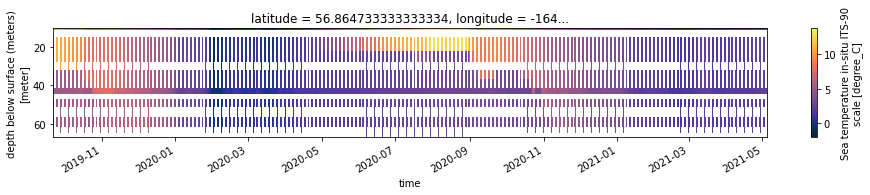

In [9]:
upper_temp = mfd.temperature.max(axis=0).max(axis=0).values
lower_temp = -2

fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.temperature.T.plot(ax=ax,yincrease=False,vmin=lower_temp,vmax=upper_temp,cmap=cmocean.cm.thermal)

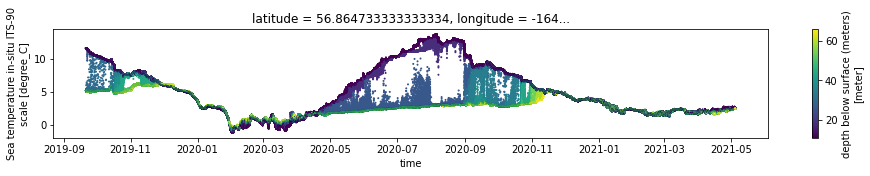

In [10]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.isel(latitude=0,longitude=0).plot.scatter(x="time",y="temperature",hue="depth",s=1,ax=ax)

**Note:** not everything has constant sample frequencies so if nan's are in the mix, then lineplots are less useful (see plot below)
Will want to resample to hourly or daily to evaluate those

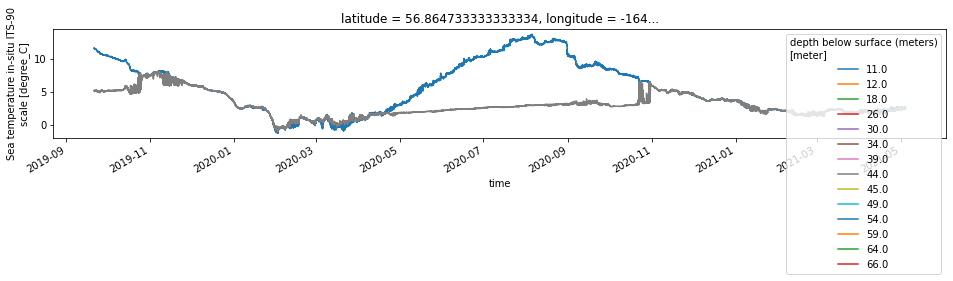

In [11]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.temperature.isel(latitude=0,longitude=0).plot.line(x="time",hue="depth",ax=ax);

## Salinity(full temporal resolution)

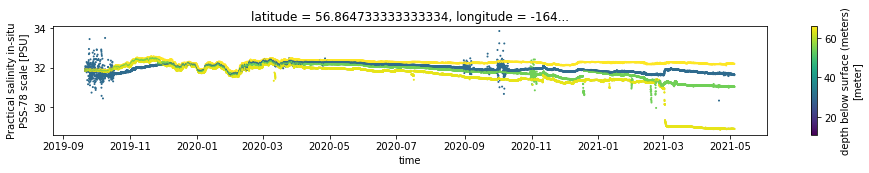

In [12]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.isel(latitude=0,longitude=0).plot.scatter(x="time",y="salinity",hue="depth",s=1,ax=ax)

## Pressure (full temporal resolution)

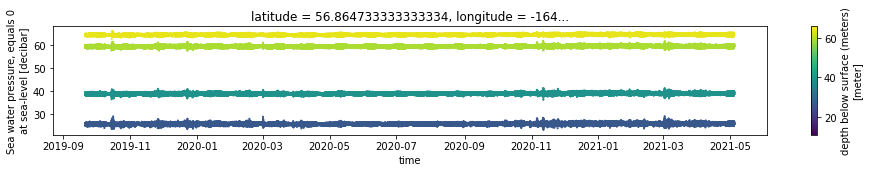

In [13]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.isel(latitude=0,longitude=0).plot.scatter(x="time",y="pressure",hue="depth",s=1,ax=ax)

## Hourly/Interpolated plots Plots

Because of the different timebases... quickly either interpolate (linearly) or downsample (this seems slower) to plot all series

In [14]:
# mfd_hourly = mfd.resample(time='1H').median() #not fast
mfd_up = mfd.interpolate_na("time")

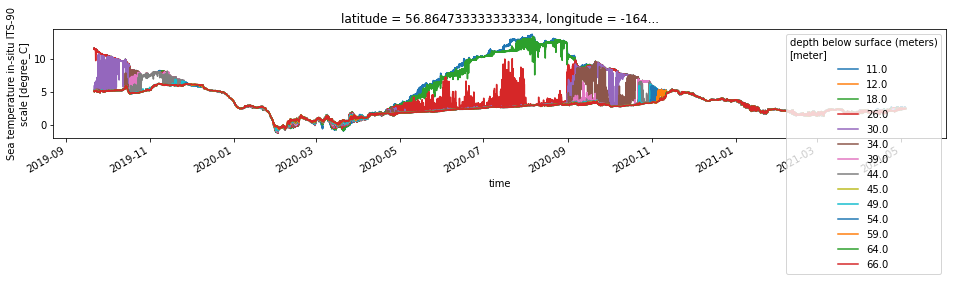

In [15]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.temperature.plot(x="time",hue="depth",ax=ax);

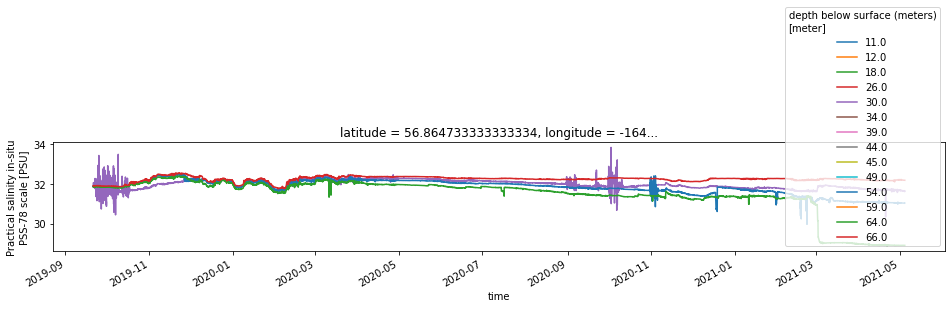

In [16]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.salinity.plot(x="time",hue="depth",ax=ax);

/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


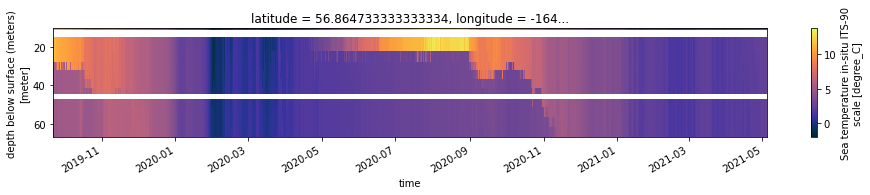

In [17]:
upper_temp = mfd_up.temperature.max(axis=0).max(axis=0).values
lower_temp = -2

fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.temperature.T.plot(ax=ax,yincrease=False,vmin=lower_temp,vmax=upper_temp,cmap=cmocean.cm.thermal)

## Chlorophyll Hourly Interpolated Plots

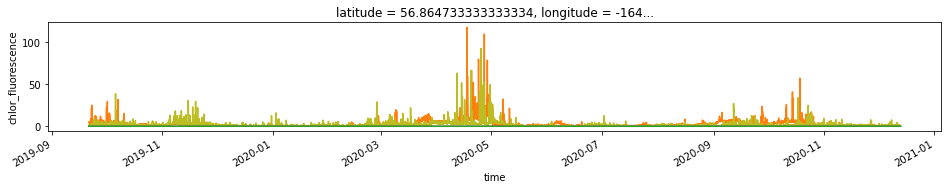

In [21]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.chlor_fluorescence.plot(x="time",hue="depth",ax=ax,add_legend=False);
(mfd_up.chlor_fluorescence*0).plot(x="time",hue="depth",ax=ax,add_legend=False);

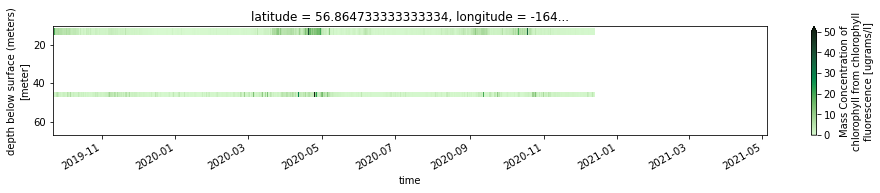

In [22]:
upper = 50
lower = 0

fig, ax = plt.subplots(1,figsize=(16, 2))
mfd_up.chlor_fluorescence.T.plot(ax=ax,yincrease=False,vmin=lower,vmax=upper,cmap=cmocean.cm.algae)

## Compare Timeseries to CTD Casts

CTD: DY1908 CTD003 is 1.0002747615881 km away ***  
CTD: DY1908 CTD004 is 1.0002747615881 km away  
CTD: DY2012 CTD071 is 0.86362049255804 km away ***   
CTD: DY2103 CTD006 is 2.7703084763244 km away ***  
CTD: DY2103 CTD007 is 2.1568009880113 km away ***   

- Recovery CTDXXX on DY2103 (wont be useful for much due to length of deployment)


In [23]:
import EcoFOCIpy.io.erddap as erddap

In [24]:
url = "http://akutan.pmel.noaa.gov:8080/erddap"

erddap.test_erddap_connection(url=url) #basic test for connection to internal server, no response is a good thing

In [25]:
#grap deploy/recover cast data from erddap hosted sets - you have to know which profile you want though
depcast = erddap.erddapCTDretrieve(url=url,cruiseid='dy1908',qclevel='final',concastno='003')
reccast = erddap.erddapCTDretrieve(url=url,cruiseid='dy2012',qclevel='preliminary',concastno='071')


## QC Notes

- a few more datapoints at start should be trimmed ... (settling period of mooring or slightly early deployment time... add 2 hours)
- some bad salinity points at end (zeros) so shorten deployment by a 2 hours too (likely due to mooring having risen to surface but "recovery" time being recorded "on deck"

+ 64m s37 fails in March of 2021 with slow offset starting april 2020 
+ 30m s37 seems ok through most of deployment... - consider good for most part
+ 54m s37 gets odd in nov 2011

+ 22m eco failed

(PJS needs to vet these)

## Generate to_edit files for PJS

- these are usually salinity focused and need the ctd casts as well as the salinity timeseries.
- save the native time scale, not the interpolated or upscaled version

In [125]:
with pd.ExcelWriter('19bs2c_salinity_to_edit.xlsx') as writer:  

    for depthkey in mfd.to_dataframe().salinity.groupby(level=[0]).groups.keys():
        if not (mfd.to_dataframe().salinity.groupby(level=[0]).get_group(depthkey).dropna(how='all')).empty:
            print(f'saving {depthkey}')
            (mfd.to_dataframe().salinity.groupby(level=[0]).get_group(depthkey).dropna(axis=0)).to_excel(writer, sheet_name=str(depthkey))

    depcast.to_excel(writer, sheet_name=depcast.profile_id.unique()[0])
    reccast.to_excel(writer, sheet_name=reccast.profile_id.unique()[0])

saving 30.0
saving 54.0
saving 64.0
saving 66.0
